In [1]:
raw_data <- read.csv("SSL_RAT_SEX_Code_60_70.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 7822

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_RANK','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','SEX_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 7822

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD
263,260892,60-70,0,0,0,0,1,-0.1,0,1
260,266937,60-70,1,1,0,1,2,-0.2,0,1
241,299825,60-70,0,3,0,0,0,0.1,0,1
237,305335,60-70,0,1,1,0,3,1.0,1,1
235,309235,60-70,0,0,3,0,1,0.6,3,1
234,310018,60-70,0,3,0,0,0,-0.3,0,1


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
#SSL_SCORE
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,1177,137.9924,0.4334100
1,6645,138.8886,0.2014172


In [7]:
# For SSL_SCORE_RANK
complete_data %>%
  group_by(SEX_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE_RANK),
            STD_ERROR = sd(SSL_SCORE_RANK) / sqrt(NUMBER_OF_PEOPLE))

SEX_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,1177,392940.2,114.85335
1,6645,392392.7,80.17586


In [8]:
# T-test without PSM for SSL_SCORE and SEX_CODE_CD
attach(complete_data)
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -1.8754, df = 1724.6, p-value = 0.06091
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.83365992  0.04109066
sample estimates:
mean in group 0 mean in group 1 
       137.9924        138.8886 


In [9]:
# T-test without PSM for SSL_SCORE_RANK and SEX_CODE_CD
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 3.9083, df = 2496.5, p-value = 9.541e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 272.7714 822.1000
sample estimates:
mean in group 0 mean in group 1 
       392940.2        392392.7 


In [10]:
mod_match <- matchit(SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

Warning message in matchit2nearest(structure(c(1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, :
"Fewer control than treated units and matching without replacement.  Not all treated units will receive a match.  Treated units will be matched in the order specified by m.order: largest"

In [11]:
mod_match


Call: 
matchit(formula = SEX_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All          1177    6645
Matched      1177    1177
Unmatched       0    5468
Discarded       0       0


In [12]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

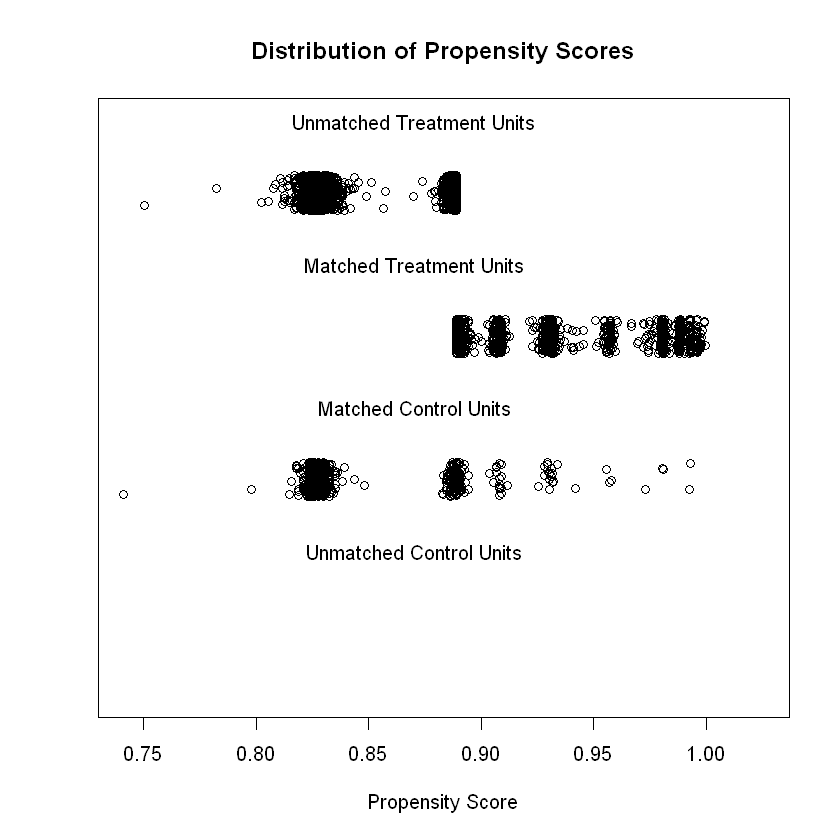

In [13]:
plot(mod_match, type = "jitter")

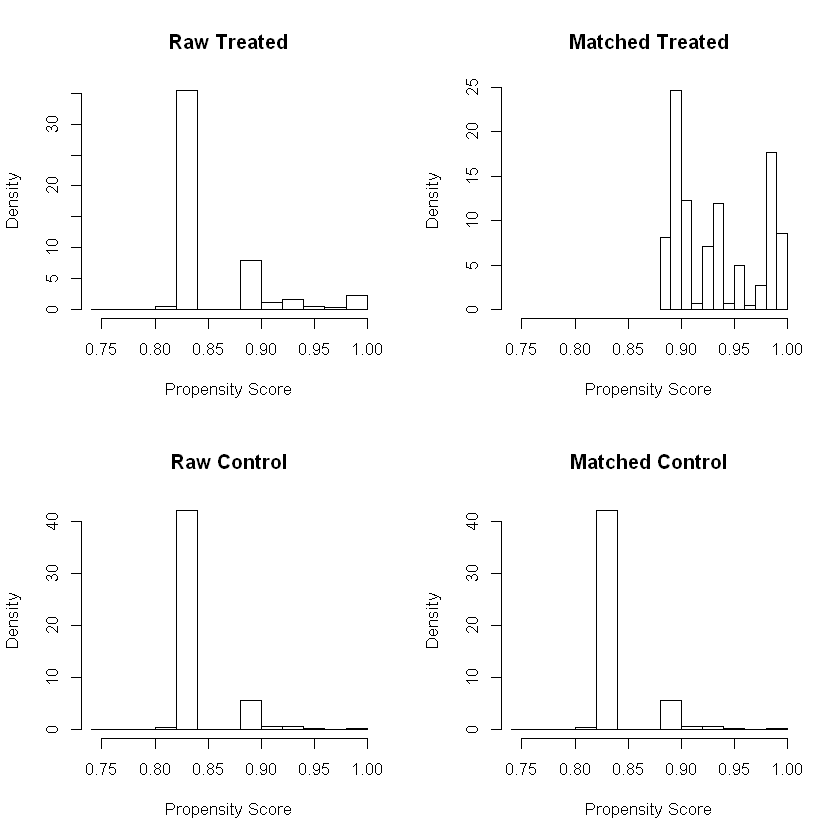

In [14]:
plot(mod_match, type = "hist")

In [15]:
head(matched)

SSL_SCORE,SSL_SCORE_RANK,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,SEX_CODE_CD,distance,weights
263,260892,60-70,0,0,0,0,1,-0.1,0,1,0.8891643,1
260,266937,60-70,1,1,0,1,2,-0.2,0,1,0.9927454,1
241,299825,60-70,0,3,0,0,0,0.1,0,1,0.9546585,1
237,305335,60-70,0,1,1,0,3,1.0,1,1,0.9821765,1
235,309235,60-70,0,0,3,0,1,0.6,3,1,0.9699011,1
234,310018,60-70,0,3,0,0,0,-0.3,0,1,0.9558174,1


In [16]:
# Doing T - test on matched records
attach(matched)

The following objects are masked from complete_data:

    PREDICTOR_RAT_AGE_AT_LATEST_ARREST,
    PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,
    PREDICTOR_RAT_GANG_AFFILIATION, PREDICTOR_RAT_NARCOTIC_ARRESTS,
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,
    PREDICTOR_RAT_UUW_ARRESTS, PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,
    PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS, SEX_CODE_CD, SSL_SCORE,
    SSL_SCORE_RANK



In [17]:
gender_female  <-subset(matched,SEX_CODE_CD == 0)
gender_male<-subset(matched,SEX_CODE_CD == 1)


In [18]:
t.test(SSL_SCORE~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE by SEX_CODE_CD
t = -13.485, df = 2150.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.363735  -8.478236
sample estimates:
mean in group 0 mean in group 1 
       137.9924        147.9133 


In [19]:
t.test(SSL_SCORE_RANK~SEX_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_RANK by SEX_CODE_CD
t = 11.257, df = 1414.8, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 3500.152 4977.450
sample estimates:
mean in group 0 mean in group 1 
       392940.2        388701.4 
